8. I denna uppgift arbetar vi med CIFAR-100 datasetet som gicks igenom i kodexempel  
a) Skapa en CNN-modell för att prediktera datasetet. 

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

In [76]:
# CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Sätt en Limit för att inte behöva träna för länge
limit = 50000
x_train = x_train[:limit]
y_train = y_train[:limit]
x_test = x_test[:limit]
y_test = y_test[:limit]

# Normalisera input-bilderna pixlarna blir mellan 0 och 1
x_train = x_train / 255.0
x_test = x_test / 255.0
print(np.shape(x_train))

(50000, 32, 32, 3)


In [77]:
print(np.shape(y_train))
print(y_train[0:5])

(50000, 1)
[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


In [78]:
# one-hot encodea labels
y_train = to_categorical(y_train, 100)
print(np.shape(y_train))
print(y_train)

(50000, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


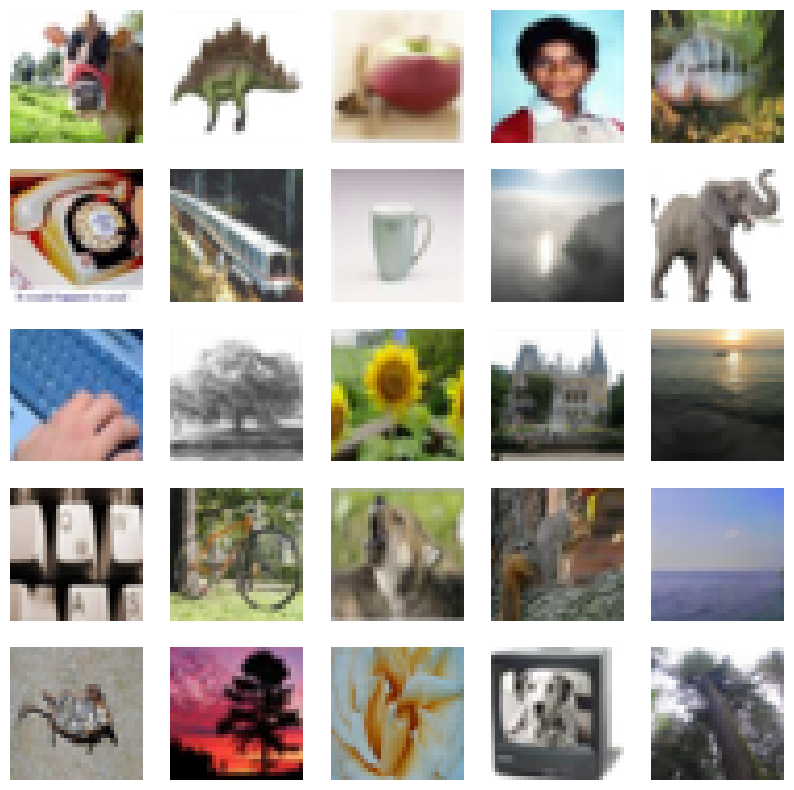

In [79]:
# Visa plott av data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

In [80]:
# Skapa modellen
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0534 - loss: 4.2192 - val_accuracy: 0.0968 - val_loss: 3.9040
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.1393 - loss: 3.6431 - val_accuracy: 0.1433 - val_loss: 3.6221
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.1976 - loss: 3.3037 - val_accuracy: 0.2160 - val_loss: 3.2583
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.2452 - loss: 3.0651 - val_accuracy: 0.2518 - val_loss: 3.0451
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.2803 - loss: 2.8749 - val_accuracy: 0.2857 - val_loss: 2.8697
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3129 - loss: 2.7107 - val_accuracy: 0.3237 - val_loss: 2.7059
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3453 - loss: 2.5536 - val_accuracy: 0.3314 - val_loss: 2.6478
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3726 - loss: 2.4260 - val_acc

In [81]:
# Gör prediktioner och beräkna accuracy
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
untuned_accuracy = np.mean(y_pred_labels == y_test.flatten())
print(f"Untuned model accuracy: {untuned_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Untuned model accuracy: 0.3937


b) Om du justerar hyperparametrar med *KerasTuner*, får du bättre resultat? 

In [82]:
import keras_tuner
from tensorflow import keras


In [84]:
def build_model(hp):
    """Build model with tunable hyperparameters based on your existing architecture"""
    model = Sequential()
    
    hp_filters_1 = hp.Int('conv1_filters', min_value=16, max_value=64, step=16)
    model.add(Conv2D(hp_filters_1, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    hp_filters_2 = hp.Int('conv2_filters', min_value=32, max_value=128, step=32)
    model.add(Conv2D(hp_filters_2, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    hp_filters_3 = hp.Int('conv3_filters', min_value=64, max_value=256, step=64)
    model.add(Conv2D(hp_filters_3, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    hp_filters_4 = hp.Int('conv4_filters', min_value=128, max_value=512, step=128)
    model.add(Conv2D(hp_filters_4, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    # Dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)
    model.add(Dropout(hp_dropout))
    
    # Dense layer units
    hp_units = hp.Int('dense_units', min_value=256, max_value=1024, step=256)
    model.add(Dense(hp_units, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    # Learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Skapa tuner
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_tuner',
    project_name='cifar100'
)

tuner.search_space_summary()

Reloading Tuner from my_tuner\cifar100\tuner0.json
Search space summary
Default search space size: 7
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
conv4_filters (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dropout (Float)
{'default': 0.3, 'conditions': [], 'min_value': 0.3, 'max_value': 0.7, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 1024, 'step': 256, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [85]:
# Kör hyperparameter sökning
tuner.search(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Ta ut de bästa hyperparametrarna
best_hp = tuner.get_best_hyperparameters(1)[0]
print(f"\nBästa hyperparametrar hittade:")
print(f"Conv1 filter: {best_hp.get('conv1_filters')}")
print(f"Conv2 filter: {best_hp.get('conv2_filters')}")
print(f"Conv3 filter: {best_hp.get('conv3_filters')}")
print(f"Conv4 filter: {best_hp.get('conv4_filters')}")
print(f"Dropout: {best_hp.get('dropout')}")
print(f"Dense units: {best_hp.get('dense_units')}")
print(f"Learning rate: {best_hp.get('learning_rate')}")

# Träna modellen på de utvalnda hyperparametrarna
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Utvärdera modellen
y_pred = best_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_labels == y_test.flatten())
print(f"\nTuned model accuracy: {accuracy}")
print(f"UnTuned model accuracy: {untuned_accuracy}")


Bästa hyperparametrar hittade:
Conv1 filter: 48
Conv2 filter: 128
Conv3 filter: 64
Conv4 filter: 256
Dropout: 0.4
Dense units: 512
Learning rate: 0.001
Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.0624 - loss: 4.1184 - val_accuracy: 0.1302 - val_loss: 3.6571
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.1797 - loss: 3.3858 - val_accuracy: 0.2304 - val_loss: 3.1339
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.2563 - loss: 2.9830 - val_accuracy: 0.2841 - val_loss: 2.8555
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.3041 - loss: 2.7359 - val_accuracy: 0.3066 - val_loss: 2.7555
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.3459 - loss: 2.5342 - val_accuracy: 0.3477 - val_loss: 2.5784
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.3812 - loss: 2.3571 - val_accuracy: 0.3686 - val_loss: 2.4509
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0

c) Prova använd *transfer learning* för att genomföra prediktioner, får du bättre resultat? 

In [87]:
# Transfer Learning med hyperparametrar från tuning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(best_hp.get('dense_units'), activation='relu')(x)  # Lägg till (x)
x = Dropout(best_hp.get('dropout'))(x)  # Lägg till (x) här!
outputs = Dense(100, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=outputs)
transfer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=best_hp.get('learning_rate')),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

transfer_history = transfer_model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=0)

transfer_pred = transfer_model.predict(x_test)
transfer_pred_labels = np.argmax(transfer_pred, axis=1)
transfer_accuracy = np.mean(transfer_pred_labels == y_test.flatten())

C:\Users\kaspe\AppData\Local\Temp\ipykernel_19396\3825219928.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [88]:
print(f"Untuned CNN: {untuned_accuracy:.4f}")
print(f"Tuned CNN: {accuracy:.4f}")
print(f"Transfer Learning: {transfer_accuracy:.4f}")


Untuned CNN: 0.3937
Tuned CNN: 0.4427
Transfer Learning: 0.1474


9. I denna uppgift utgår vi ifrån kodexempel 2 i detta kapitel. 

a) Ta egna bilder som du predikterar med en förtränad modell. 

In [92]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [101]:
# Load pre_trained ResNet50 model
model = ResNet50(weights="imagenet")

# Paths to two images
img_paths = ["pickuptruck.png", "wolf.jpg", "racoon.webp", "180523201.png"]

# Load and preprocess both images
imgs = []
for path in img_paths:
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    imgs.append(x)

# Stack into a single batch
batch = np.vstack(imgs)

# Predict
preds = model.predict(batch, verbose=2)

# Decode and print results
for i, pred in enumerate(preds):
    print(f"Predicted for image {i+1}:",
          decode_predictions(pred.reshape(1, 1000), top=3)[0])

1/1 - 1s - 1s/step
Predicted for image 1: [('n03930630', 'pickup', np.float32(0.8452215)), ('n03594945', 'jeep', np.float32(0.09037922)), ('n03345487', 'fire_engine', np.float32(0.026645137))]
Predicted for image 2: [('n02114712', 'red_wolf', np.float32(0.3269195)), ('n02114855', 'coyote', np.float32(0.3188513)), ('n02114367', 'timber_wolf', np.float32(0.3126123))]
Predicted for image 3: [('n02443114', 'polecat', np.float32(0.19616815)), ('n02120505', 'grey_fox', np.float32(0.15232302)), ('n02447366', 'badger', np.float32(0.10221834))]
Predicted for image 4: [('n02105641', 'Old_English_sheepdog', np.float32(0.45893767)), ('n02086240', 'Shih-Tzu', np.float32(0.1984964)), ('n02085936', 'Maltese_dog', np.float32(0.05014962))]
